In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score

In [8]:
empdata = pd.read_csv("C:/Data/wholedata.csv")

In [9]:
empdata.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4


<AxesSubplot:>

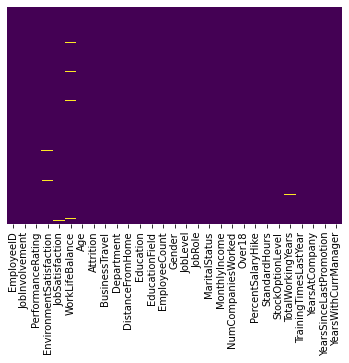

In [12]:
sns.heatmap(empdata.isnull(), yticklabels=False, cbar=False, cmap='viridis')


The heatmap shows there are a lot of null values. Next we will remove all the null values to get a better picture of the data.

In [15]:
empdata.isnull().sum()


EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [17]:
empdata= empdata.dropna()

In [18]:
empdata

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,No,Travel_Rarely,Sales,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [19]:
empdata.describe()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,2.728837,3.153953,2.723953,2.724884,2.761163,36.926977,9.197907,2.913256,1.0,...,65059.844186,2.690000,15.210698,8.0,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558
std,1272.117692,0.710769,0.360946,1.093802,1.101875,0.707800,9.146517,8.097059,1.024774,0.0,...,47045.398914,2.495764,3.662777,0.0,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1110.750000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,...,29260.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2215.500000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,...,49360.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3314.250000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,...,83802.500000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000
max,4409.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [20]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in empdata.columns:
    if isinstance(empdata[i][0],str):
        empdata[i] = encoder.fit_transform(empdata[i])

In [21]:
empdata

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,2,2,...,1.0,0,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,1,1,...,0.0,0,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,1,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,0,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,2,1,...,4.0,0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,2,2,...,1.0,0,18,8,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,2,1,...,3.0,0,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,2,1,...,2.0,0,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,2,1,...,0.0,0,20,8,0,5.0,4,4,1,2


In [22]:
empdata.Attrition.value_counts()


0    3605
1     695
Name: Attrition, dtype: int64

We can see from the above mentioned syntax that the dataset is HIGHLY IMBALANCED. The majority class (No attrition) exceeds the minority class(Attrition) by approximately 5 times. 

In [29]:
import matplotlib.pyplot as plt
labels = 'Majority', 'Minority'
sizes = [3605,695]
colors = ['gold''lightcoral']
explode = (0.1, 0) 


([<matplotlib.patches.Wedge at 0x2342b303130>,
 [Text(-0.5834747157944258, -1.0485977570205909, 'Majority'),
  Text(0.5348517778138535, 0.9612146356404279, 'Minority')],
 [Text(-0.34036025088008165, -0.6116820249286781, '83.8%'),
  Text(0.291737333353011, 0.524298892167506, '16.2%')])

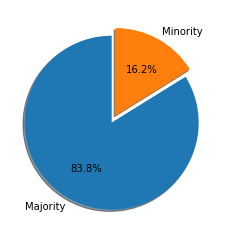

In [30]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

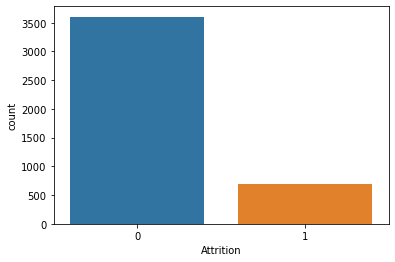

In [35]:
sns.countplot(x='Attrition',data=empdata)  
plt.show()  

Let's say we now have to plot some graphs. The manager of the the company wants to see which department has the highest attrition rate. 


In [32]:
empdata.Department.value_counts()


1    2807
2    1307
0     186
Name: Department, dtype: int64

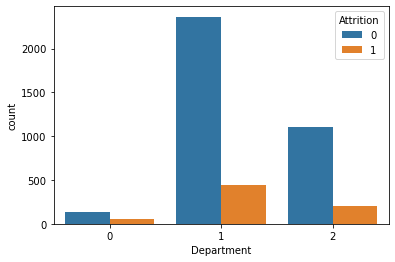

In [48]:
import seaborn as sns  
import pandas as pd     
 
chart=sns.countplot(x='Department',hue='Attrition',data=empdata)  
chart.labels=['sales','hr','rd']
plt.show() 